In [207]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [208]:
#Naive Bayes

divorce = pd.read_csv('/home/anderson/Área de Trabalho/Repositorios_GIT/Estatistica_descritiva_Trabalho_Grupo_1/data-eng/divorce.csv',sep=';')
divorce.head(3)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1


In [218]:
#Definindo nova estrutura do dataSet a ser utilizado. Há 6 features princiapais, porque segundo
#estudo foram valores mais significantes.
divorce_teste = divorce[['Atr2','Atr6','Atr11','Atr18','Atr26', 'Atr40','Class']]


divorce_teste.head(n = 4)

,Atr2,Atr6,Atr11,Atr18,Atr26,Atr40,Class
0,2,0,1,0,0,3,1
1,4,0,4,4,1,4,1
2,2,3,3,3,2,3,1
3,2,3,4,3,1,4,1


In [230]:

def separate_by_class(dataset):
  classes = np.unique(dataset['Class'])

  separated = []
  for cl in classes:
    separated.append(dataset[dataset['Class'] == cl])

  return separated

separated = separate_by_class(divorce_teste)

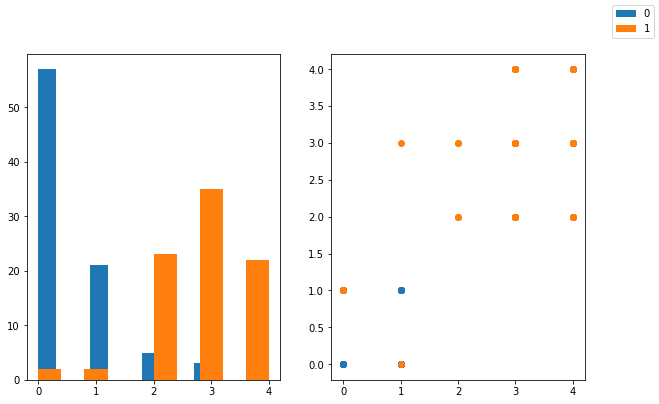

In [231]:
#Exibindo histograma de acordo com casados e divorciados. 0=Casado, 1=Divorciado

fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,h=6)
for s in separated:
  ax[0].hist(s['Atr2']) 
  ax[1].scatter(s['Atr11'], s['Atr18']) 
fig.legend(['0', '1'])

In [232]:
#Calculando desvio padrão de cada coluna do dataset

def summarize_dataset(dataset, eliminate_last=True):
  if eliminate_last:
    columns = dataset.columns[:-1]
  else:
    columns = dataset.columns
  summaries = [(np.mean(dataset[column]), np.std(dataset[column]), len(dataset[column])) for column in columns]
  del(summaries[-1])
  return summaries

summaries = summarize_dataset(divorce_teste,True)

print(summaries)

[(1.6529411764705881, 1.4643278510508917, 170), (0.7470588235294118, 0.9013830204086202, 170), (1.688235294117647, 1.642230317350433, 170), (1.5176470588235293, 1.5613852424794212, 170), (1.488235294117647, 1.4960270337841988, 170)]


In [234]:
def summarize_by_class(dataset):
  separated = separate_by_class(dataset)
  summaries = dict()
  for s in separated:
    class_value = np.array(s['Class'])
    rows = s[s.columns]
    summaries[class_value[0]] = summarize_dataset(rows, eliminate_last=False)
  return summaries

# Para cada classe, calcula a média, o desvio padrão e a quantidade de elementos de cada coluna do dataset
summaries_by_class = summarize_by_class(divorce_teste)
print(summaries_by_class)


{0: [(0.46511627906976744, 0.757868406362806, 86), (0.37209302325581395, 0.7320965692417294, 86), (0.19767441860465115, 0.39824520440799305, 86), (0.09302325581395349, 0.29046502318132095, 86), (0.19767441860465115, 0.39824520440799316, 86), (0.20930232558139536, 0.4850384561538191, 86)], 1: [(2.869047619047619, 0.9099942687517315, 84), (1.130952380952381, 0.8968166174594865, 84), (3.2142857142857144, 0.8319716766502921, 84), (2.9761904761904763, 0.8014301276050879, 84), (2.8095238095238093, 0.9571310115353224, 84), (3.5714285714285716, 0.7284313590846839, 84)]}


In [225]:
#Probabilidade Gaussiana

In [226]:
def calculate_probability(x, mean, stdev):
	exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent

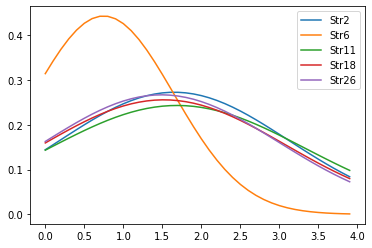

In [235]:
#Distribuição de probabilidade 

x = np.arange(0,4,0.1)
for summ in summaries:
    y = calculate_probability(x, summ[0], summ[1])
    plt.plot(x,y)

plt.legend(['Str2','Str6','Str11','Str18','Str26','Str40'])

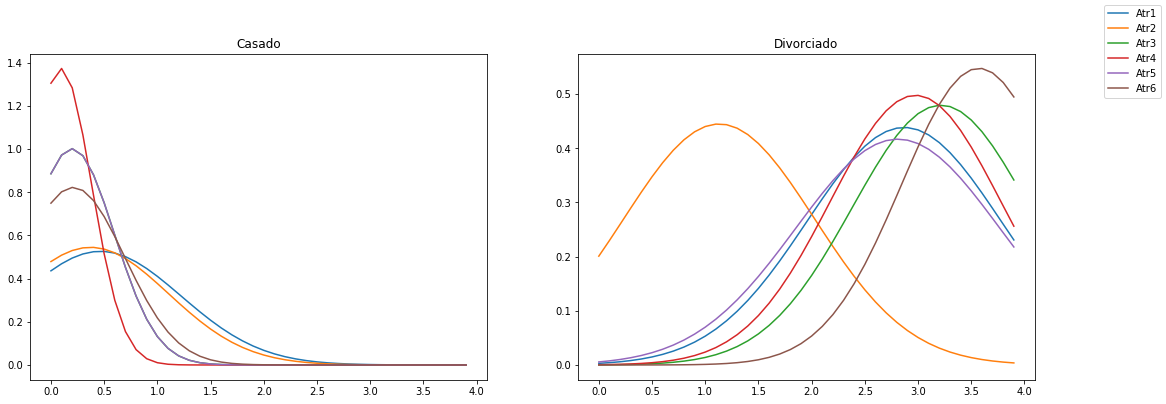

In [236]:
#Probabilidade de acordo com a classe. 1 divorciado, 0 casado.


n_classes = len(summaries_by_class)
fig,ax = plt.subplots(1,n_classes)
fig.set_size_inches(18, h=6)

classes_name = ['Casado', 'Divorciado']
for c in range(n_classes):
  for summ in summaries_by_class[c]:
      ax[c].plot(x, calculate_probability(x, summ[0], summ[1]))
  ax[c].set_title(classes_name[c])

#Escolheremos algumas colunas
fig.legend(['Atr1', 'Atr2','Atr3', 'Atr4','Atr5', 'Atr6'])


In [ ]:
# Cálculo do percentual de acurácia
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [ ]:
# Predizer a classe de uma dada linha
def predict(summaries, row):

    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label


In [ ]:
# Cálculo da probabilidade de predizer cada classe para uma dada linha da dados
def calculate_class_probabilities(summaries, row):
  total_rows = sum([summaries[label][0][2] for label in summaries])
  probabilities = dict()
  for class_value, class_summaries in summaries.items():
    probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
    for i in range(len(class_summaries)):
      mean, stdev, count = class_summaries[i]
      probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
  return probabilities


In [237]:
# Dividir o dataset em treinamento e teste
def split(dataset):
  sz = dataset.shape[0]
  sh = np.arange(sz)
  np.random.shuffle(sh)
  vec = np.zeros((sz),dtype=bool)
  vec[sh[:int(sz*0.75)]] = True
  train = dataset.loc[vec]
  test = dataset.loc[~vec]

  return train, test


In [238]:
train,test = split(divorce_teste)

In [239]:
# Algoritmo Naive Bayes
def naive_bayes(train, test):
  summarize = summarize_by_class(train)
  predictions = list()
  vec = np.zeros(test.shape[0], dtype=bool)
  for i in range(test.shape[0]):
    vec[i] = True
    row = np.array(test.loc[vec])[0]
    output = predict(summarize, row)
    predictions.append(output)
    vec[i] = False
  return(predictions)

In [240]:
# Realização de predições conforme o algoritmo Naive Bayes
predictions = naive_bayes(train,test)

print(predictions)
actual = np.array(test['Class'])
print(actual)

# Acurácia
print('Accuracy ', accuracy_metric(actual, predictions))

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


NameError: name 'accuracy_metric' is not defined